# Analiza podatkov NBA igralcev iz sezone 2017/18

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import os
strelci = pd.read_csv('podatki_pravi.csv', index_col = 'ime')
pd.options.display.max_rows = 25

Legenda kratic <br>
fgm = field goals made (število zadetih metov) <br>
fga = field goals attempts (število vseh zadetih in zgrešenih metov) <br>
fg = fielg goals (delež zadetih metov iz igre) <br>
3pm = three points made (število zadetih metov za 3 točke) <br>
3pa = three points attempts (število vseh zadetih in zgrešenih metov za 3 točke) <br>
ftm = free throws made (število zadetih prostih metov) <br>
fta = free throw attempts (število vseh zadetih in zgrešenih prostih metov) <br>
ft = free throw (delež zadetih prostih metov)

10 igralcev z največjim povprečjem doseženih točk na tekmo

In [4]:
strelci.head(10)

,pozicija,ekipa,st_tekem,minute_na_tekmo,tocke,fgm-fga,fg,3pm-3pa,3p,ftm-fta,ft
ime,,,,,,,,,,,
James Harden,PG,HOU,72,35.4,30.4,9.0-20.1,0.449,3.7-10.0,0.367,8.7-10.1,0.858
Anthony Davis,PF,NO,75,36.4,28.1,10.4-19.5,0.534,0.7-2.2,0.340,6.6-8.0,0.828
LeBron James,SF,CLE,82,36.9,27.5,10.5-19.3,0.542,1.8-5.0,0.367,4.7-6.5,0.731
Damian Lillard,PG,POR,73,36.6,26.9,8.5-19.4,0.439,3.1-8.6,0.361,6.8-7.4,0.916
Giannis Antetokounmpo,PF,MIL,75,36.7,26.9,9.9-18.7,0.529,0.6-1.9,0.307,6.5-8.5,0.760
Kevin Durant,SF,GS,68,34.2,26.4,9.3-18.0,0.516,2.5-6.1,0.419,5.3-5.9,0.889
Russell Westbrook,PG,OKC,80,36.4,25.4,9.5-21.1,0.449,1.2-4.1,0.298,5.2-7.1,0.737
Kyrie Irving,PG,BOS,60,32.2,24.4,8.9-18.1,0.491,2.8-6.8,0.408,3.9-4.4,0.889
LaMarcus Aldridge,PF,SA,75,33.5,23.1,9.2-18.0,0.510,0.4-1.2,0.293,4.5-5.3,0.837


10 igralcev z najmanjšim povprečjem doseženih točk na tekmo

In [3]:
strelci.tail(10)

,pozicija,ekipa,st_tekem,minute_na_tekmo,tocke,fgm-fga,fg,3pm-3pa,3p,ftm-fta,ft
ime,,,,,,,,,,,
Salah Mejri,C,DAL,61,12.0,3.5,1.4-2.2,0.642,0.0-0.0,0.000,0.6-1.1,0.576
Malik Beasley,SG,DEN,62,9.5,3.2,1.2-2.9,0.410,0.5-1.3,0.341,0.4-0.5,0.667
Terrance Ferguson,SG,OKC,61,12.5,3.1,1.1-2.8,0.414,0.7-2.0,0.333,0.1-0.2,0.900
Tim Frazier,PG,WSH,59,14.2,3.0,1.2-2.9,0.395,0.3-0.9,0.304,0.4-0.5,0.767
Semi Ojeleye,PF,BOS,73,15.8,2.7,0.9-2.6,0.346,0.5-1.7,0.320,0.3-0.6,0.610
Ekpe Udoh,C,UTAH,63,12.9,2.6,1.0-1.9,0.500,0.0-0.0,0.000,0.7-0.9,0.750
Josh Huestis,F,OKC,69,14.2,2.3,0.9-2.6,0.330,0.5-1.7,0.287,0.1-0.3,0.300
Brandon Paul,G,SA,64,9.0,2.3,0.9-2.0,0.433,0.2-0.8,0.278,0.3-0.7,0.512
Eric Moreland,C,DET,67,12.0,2.1,1.0-1.8,0.541,0.0-0.0,0.000,0.2-0.4,0.379


In [4]:
povprecje_tock = strelci.tocke.mean()
povprecje_minut= strelci.minute_na_tekmo.mean()
povprecje_tock


11.12239382239383

Povprečje doseženih točk na tekmo.

In [5]:
povprecje_minut

24.85405405405405

Povprečje odigranih minut na tekmo.

In [20]:
v_ekipi = strelci[['ekipa']].groupby(['ekipa']).size()
po_vrsti = v_ekipi.sort_values(ascending = False)
po_vrsti.head(20)

ekipa
TOR     11
WSH     10
SAC     10
SA      10
POR     10
OKC     10
GS      10
CHA      9
MIN      9
DAL      9
DET      8
IND      8
HOU      8
UTAH     8
DEN      8
MIA      8
BOS      8
BKN      8
CHI      7
LAC      7
dtype: int64

V tabeli je prikazano 20 ekip, ki so uporabile največ različnih igralcev na vsaj 60 tekmah. Vidimo, da je največ različnih igralcev uporabila ekipa Toronta. 

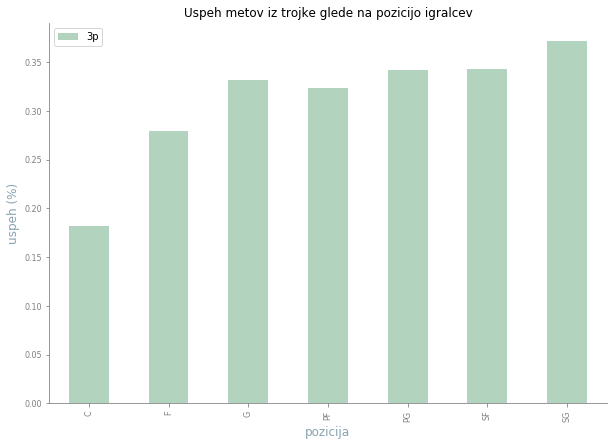

In [6]:
Uspesnost_3_glede_na_pozicijo = strelci[['pozicija', '3p']].groupby(['pozicija']).mean()
usp = Uspesnost_3_glede_na_pozicijo.plot(kind='bar', title="Uspeh metov iz trojke glede na pozicijo igralcev",
                          figsize=(10, 7), legend=True, fontsize=8, color='#b2d3be')
usp.set_xlabel("pozicija", fontsize=12, color='#89a3b2')
usp.set_ylabel("uspeh (%)", fontsize=12, color='#89a3b2')
usp.spines['right'].set_visible(False)
usp.spines['top'].set_visible(False)
usp.tick_params(color='gray', labelcolor='gray')
for spine in usp.spines.values():
    spine.set_edgecolor('gray')

Graf ispešnosti metov za 3 točke glede na pozicijo potrdi hipotezo, da imajo igralci zunanjih pozicij (večinoma nižjih) PG, G in SG boljši odstotek meta za 3 točke kot igralci ki so bližje košu ki so večinoma veliko višji. 

,fg
pozicija,
C,0.543868
PF,0.480423
F,0.465667
SF,0.453346
PG,0.442222
SG,0.436873
G,0.421636


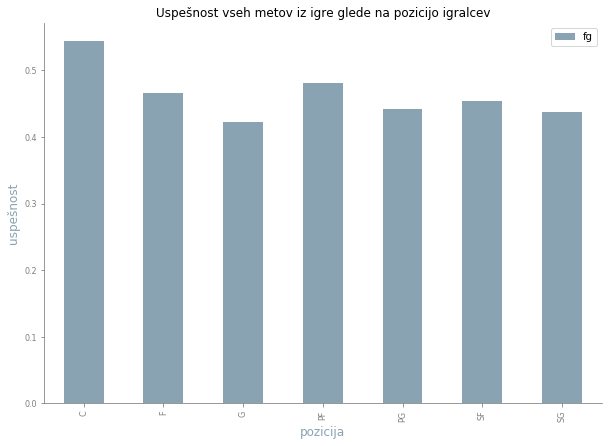

In [7]:
usp_met_poz = strelci[['pozicija', 'fg']].groupby(['pozicija']).mean()
usp_met_pozbc = usp_met_poz.plot(kind='bar', title="Uspešnost vseh metov iz igre glede na pozicijo igralcev",
                          figsize=(10, 7), legend=True, fontsize=8, color='#89a3b2')
usp_met_pozbc.set_xlabel("pozicija", fontsize=12, color='#89a3b2')
usp_met_pozbc.set_ylabel("uspešnost", fontsize=12, color='#89a3b2')
usp_met_pozbc.spines['right'].set_visible(False)
usp_met_pozbc.spines['top'].set_visible(False)
usp_met_pozbc.tick_params(color='gray', labelcolor='gray')
for spine in usp_met_pozbc.spines.values():
    spine.set_edgecolor('gray')

usp_met_poz.sort_values(['fg'], ascending =  False)

V grafu vidimo da imajo višji igralci, ki so blićje košu (C, PF) veliko višji odstotek skupnega meta iz igre. Centri so tudi edini ki v povprečju iz igre zadenejo oeč kot polovico metov.

,ft
pozicija,
SG,0.801036
PG,0.790867
SF,0.766692
PF,0.743962
G,0.738545
C,0.695816
F,0.646333


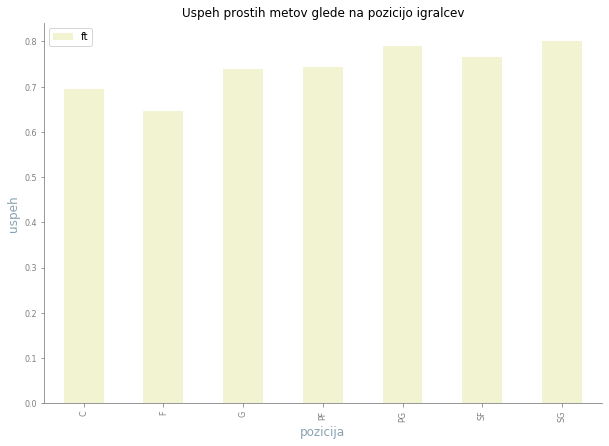

In [8]:
usp_pros_poz = strelci[['pozicija', 'ft']].groupby(['pozicija']).mean()
# print(uspProsNaPoz)  # prikazi tabelo uspesnosti prostih metov
# graf uspesnosti prostih metov
usp_pros_pozbc = usp_pros_poz.plot(kind='bar', title="Uspeh prostih metov glede na pozicijo igralcev",
                          figsize=(10, 7), legend=True, fontsize=8, color='#f2f4d1')
usp_pros_pozbc.set_xlabel("pozicija", fontsize=12, color='#89a3b2')
usp_pros_pozbc.set_ylabel("uspeh", fontsize=12, color='#89a3b2')
usp_pros_pozbc.spines['right'].set_visible(False)
usp_pros_pozbc.spines['top'].set_visible(False)
usp_pros_pozbc.tick_params(color='gray', labelcolor='gray')
for spine in usp_pros_pozbc.spines.values():
    spine.set_edgecolor('gray')
    
usp_pros_poz.sort_values(['ft'], ascending =  False)

Iz grafa vidimo da imajo višji igralci celo do 20% slabšo uspešnost izvajanja prosih metov od nižjih kar potrjuje hipotezo da nižji igralci boljše izvajajo proste mete.

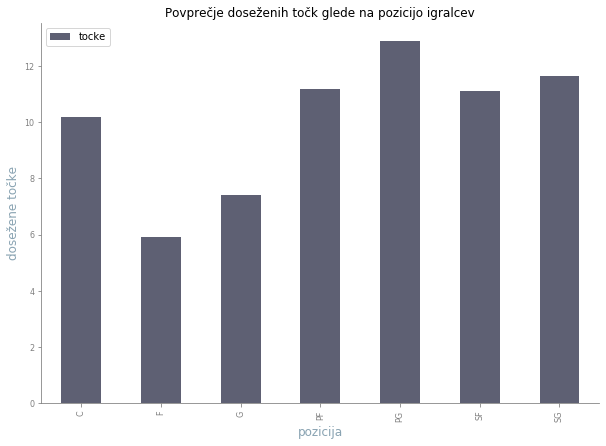

In [9]:
tocke_na_poz = strelci[['pozicija', 'tocke']].groupby(['pozicija']).mean()

tocke_na_pozbc = tocke_na_poz.plot(kind='bar', title="Povprečje doseženih točk glede na pozicijo igralcev",
                          figsize=(10, 7), legend=True, fontsize=8, color='#5e6073')
tocke_na_pozbc.set_xlabel("pozicija", fontsize=12, color='#89a3b2')
tocke_na_pozbc.set_ylabel("dosežene točke", fontsize=12, color='#89a3b2')
tocke_na_pozbc.spines['right'].set_visible(False)
tocke_na_pozbc.spines['top'].set_visible(False)
tocke_na_pozbc.tick_params(color='gray', labelcolor='gray')
plt.legend(loc='upper left')
for spine in tocke_na_pozbc.spines.values():
    spine.set_edgecolor('gray')

Poziciji F in G sta (kot bo vidno v enem izmed naslednjih grafov) najmanj pogosti med igralci. Skupaj je manj kot 7% igralcev na teh 2 pozicijah zato ni presenečenje, da igralci teh pozicij dosegajo v povprečju manj točk. Iz preostalih podatkov razberemo, da današnja košarka daje največji pomen zunanjim pozicijam. Sploh organizatorji (PG) izstopajo po številu doseženih točk v povprečju. Zanimivo je, da je skozi zgodovino večinoma igra bazirala na višjih igralcih pod košem, ki pa imajo v današnji košarki kot je razvidno iz grafa najmanjši točkovni doprinos.

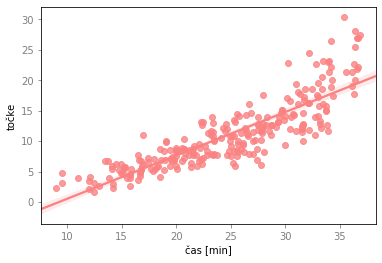

In [10]:
tockePoMin = sns.regplot(y=strelci['tocke'], x=strelci["minute_na_tekmo"], fit_reg=True, color="#fa8282")
tockePoMin.set(xlabel='čas [min]', ylabel='točke')
tockePoMin.tick_params(color='gray', labelcolor='gray')
plt.show()

V grafu vidimo točke vseh igralcev v odvisnosti od igralnega časa. Zraven je narisana tudi premica ki najboljše prikaže povprečje gibanja števila točk glede na minute. Vidimo, da je večina igracev enakomerno razporejena nad in pod premico razen tistih nekaj igralcev ki igrajo nejveč je večina nad premico kar pomeni da dosegajo več točk kot bi pričakovali glede na točkovno povprečje glede na minute oziroma tisti, ki igrajo največ so boljši.

In [11]:
precenjeni = strelci[(strelci.minute_na_tekmo >30) & (strelci.tocke < 15)]
precenjeni.sort_values(['minute_na_tekmo', 'tocke'], ascending=[False, True])




,pozicija,ekipa,st_tekem,minute_na_tekmo,tocke,fgm-fga,fg,3pm-3pa,3p,ftm-fta,ft
ime,,,,,,,,,,,
Trevor Ariza,SF,HOU,67,33.9,11.7,4.0-9.7,0.412,2.5-6.9,0.368,1.1-1.3,0.854
Wesley Matthews,SG,DAL,63,33.8,12.7,4.5-11.1,0.406,2.4-6.4,0.381,1.3-1.6,0.822
Taj Gibson,PF,MIN,82,33.3,12.2,5.2-9.0,0.577,0.1-0.4,0.200,1.7-2.3,0.768
Josh Richardson,SG,MIA,81,33.2,12.9,4.9-10.9,0.451,1.6-4.1,0.378,1.5-1.8,0.845
Kentavious Caldwell-Pope,SG,LAL,74,33.2,13.4,4.6-10.8,0.426,2.1-5.6,0.383,2.1-2.6,0.789
Jeff Teague,PG,MIN,70,33.0,14.2,5.1-11.3,0.446,1.2-3.3,0.368,2.9-3.4,0.845
Draymond Green,PF,GS,70,32.7,11.0,4.0-8.8,0.454,1.1-3.7,0.301,1.9-2.5,0.775
Steven Adams,C,OKC,76,32.7,13.9,5.9-9.4,0.629,0.0-0.0,0.000,2.1-3.8,0.559
Thaddeus Young,PF,IND,81,32.2,11.8,5.2-10.7,0.487,0.7-2.2,0.320,0.7-1.1,0.598


Tabela prikazuje igralce ki igrajo veliko (več kot 30) minut ampak dajo glede na ta čas zelo malo (manj kot 15) točk. Povprečje vseh igralcev, ki igrajo več kot 30 minut na tekmo je 17.9 točk.

In [12]:
veliko_igrajo = strelci[(strelci.minute_na_tekmo > 30 )]
veliko_igrajo.tocke.mean()

17.92714285714287

In [13]:
podcenjeni = strelci[(strelci.minute_na_tekmo < 25) & (strelci.tocke > 10)]
podcenjeni.sort_values(['tocke', 'minute_na_tekmo'], ascending = [False, True])

,pozicija,ekipa,st_tekem,minute_na_tekmo,tocke,fgm-fga,fg,3pm-3pa,3p,ftm-fta,ft
ime,,,,,,,,,,,
Jordan Clarkson,PG,CLE/LAL,81,23.3,13.9,5.3-11.8,0.451,1.4-3.9,0.352,1.9-2.3,0.800
Michael Beasley,SF,NY,74,22.3,13.2,5.5-10.9,0.507,0.5-1.2,0.395,1.7-2.1,0.780
Bobby Portis,PF,CHI,73,22.5,13.2,5.2-11.1,0.471,1.1-3.1,0.359,1.6-2.1,0.769
Brook Lopez,C,LAL,74,23.4,13.0,5.0-10.7,0.465,1.5-4.4,0.345,1.5-2.1,0.703
Jeremy Lamb,SG,CHA,80,24.6,12.9,4.8-10.4,0.457,1.2-3.2,0.370,2.2-2.6,0.861
Jonas Valanciunas,C,TOR,77,22.4,12.7,5.1-8.9,0.568,0.4-1.0,0.405,2.2-2.7,0.806
Marco Belinelli,G,ATL/PHI,80,24.3,12.1,4.2-9.6,0.441,1.9-4.9,0.377,1.9-2.0,0.908
Dirk Nowitzki,PF,DAL,77,24.7,12.0,4.5-9.8,0.456,1.8-4.4,0.409,1.3-1.4,0.898
J.J. Barea,PG,DAL,69,23.2,11.6,4.4-10.0,0.439,1.7-4.5,0.367,1.2-1.5,0.784


Igralci, ki v manj kot 25 minutah na tekmo dajejo največ (več kot 10) točk. Povprečje  vseh igralcev, ki odigrajo manj kot 20 minut na tekmo je 7.2 točk. 

In [14]:
malo_igrajo = strelci[(strelci.minute_na_tekmo < 25)]
malo_igrajo.tocke.mean()

7.229599999999996

In [15]:
najboljsi = strelci[(strelci.tocke > 20) & (strelci.fg > 0.5)]
najboljsi.sort_values(['tocke', 'minute_na_tekmo'], ascending = [False, True])

,pozicija,ekipa,st_tekem,minute_na_tekmo,tocke,fgm-fga,fg,3pm-3pa,3p,ftm-fta,ft
ime,,,,,,,,,,,
Anthony Davis,PF,NO,75,36.4,28.1,10.4-19.5,0.534,0.7-2.2,0.340,6.6-8.0,0.828
LeBron James,SF,CLE,82,36.9,27.5,10.5-19.3,0.542,1.8-5.0,0.367,4.7-6.5,0.731
Giannis Antetokounmpo,PF,MIL,75,36.7,26.9,9.9-18.7,0.529,0.6-1.9,0.307,6.5-8.5,0.760
Kevin Durant,SF,GS,68,34.2,26.4,9.3-18.0,0.516,2.5-6.1,0.419,5.3-5.9,0.889
LaMarcus Aldridge,PF,SA,75,33.5,23.1,9.2-18.0,0.510,0.4-1.2,0.293,4.5-5.3,0.837
Karl-Anthony Towns,C,MIN,82,35.6,21.3,7.8-14.3,0.545,1.5-3.5,0.421,4.2-4.9,0.858


V tabeli so vsi igralci, ki ob več kot 50% skupnem metu iz igre dosegajo več kot 20 točk na tekmo. Povprečen met iz igre vseh igralcev ki dosegajo več kot 20 točk na tekmo je 47%.

In [16]:
veliko_tock = strelci[(strelci.tocke > 20)]
veliko_tock.fg.mean()

0.47427272727272723

Text(0.5, 1.0, 'Delež posamezne pozicije')

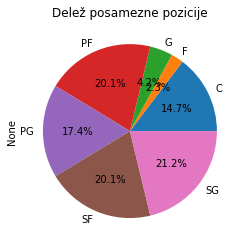

In [17]:
stevilo = strelci[['pozicija']].groupby(['pozicija']).size()
stevilo.plot.pie(subplots=True, autopct='%.1f%%',)
plt.title("Delež posamezne pozicije")


Na diagramu je prikazan delež igralcev posamezne pozicije. Z izjemo G in F pozicije katerih je najmanj so igralci dokaj enakomerno razporejeni po vseh 5 osnovnih pozicijah. Nekaj manj je PG, ki pa dosegajo največ točk v povprečju na tekmo in C, ki dosegajo najmanj točk na tekmo.

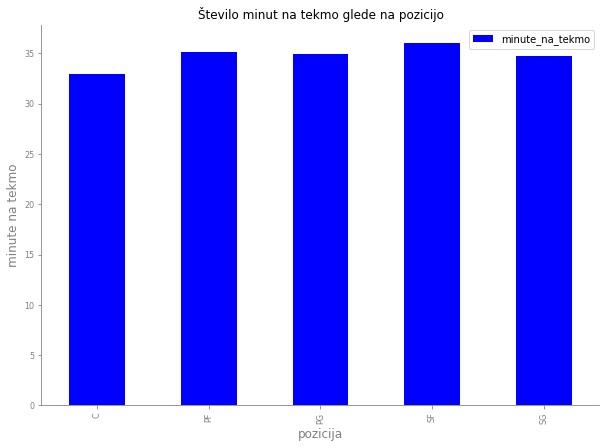

In [18]:
pomembnejši = strelci[(strelci.tocke > 20)]
min_na_pozicijo = pomembnejši[['pozicija', 'minute_na_tekmo']].groupby(['pozicija']).mean()
min_na_pozicijobc = min_na_pozicijo.plot(kind='bar', title="Število minut na tekmo glede na pozicijo",
                          figsize=(10, 7), legend=True, fontsize=8, color='blue')
min_na_pozicijobc.set_xlabel("pozicija", fontsize=12, color='grey')
min_na_pozicijobc.set_ylabel("minute na tekmo", fontsize=12, color='grey')
min_na_pozicijobc.spines['right'].set_visible(False)
min_na_pozicijobc.spines['top'].set_visible(False)
min_na_pozicijobc.tick_params(color='gray', labelcolor='gray')
for spine in min_na_pozicijobc.spines.values():
    spine.set_edgecolor('gray')


V košarki je vseh 5 pozicij obenem na igrišču tako, da je pričakovano da so razlike med povprečnim igralnim časom posameznih pozicij na tekmo zelo majhne.  Tekma traja 48 minut, nobena pozicija pa ne dosega 48 minut zato, ker so v analizo podatkov zajeti samo igralci, ki so odigrali vsaj 60 tekem. 

Text(0.5, 1.0, 'Delež posamezne pozicije')

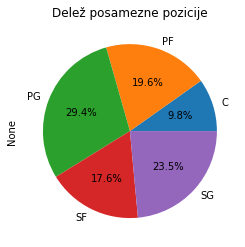

In [19]:
koliko_med_top = strelci[(strelci.tocke >15)]
koliko_med_topbc = koliko_med_top[['pozicija']].groupby(['pozicija']).size()


koliko_med_topbc.plot.pie(subplots=True, autopct='%.1f%%',)
plt.title("Delež posamezne pozicije")


V grafu so prikazani vsi igralci, ki so dosegli več kot 15 točk na tekmo razporejeni glede na pozicijo. Vidimo, da je največ igralcev zunanjih pozicij PG in SG. Bližje košu kot so igralci manj je takih, ki dosežejo vsaj 15 točk na tekmo. To kaže na to da se košarka "seli" vedno bolj izven rakete in da višina ni več tako pomembna.